In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [38]:
base_dir = "10_food_classes_all_data"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')  
validation_dir = os.path.join(base_dir, 'val')  

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)  
val_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(224, 224),
                                                    batch_size=20, 
                                                    class_mode='categorical',
                                                    classes=['pizza', 'sushi', 'steak'])


validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(224, 224),
                                                        batch_size=20, 
                                                        class_mode='categorical',
                                                        classes=['pizza', 'sushi', 'steak'])
testing_generator = test_datagen.flow_from_directory(test_dir, 
                                                        target_size=(224, 224),
                                                        batch_size=20, 
                                                        class_mode='categorical',
                                                        classes=['pizza', 'sushi', 'steak'])


Found 1800 images belonging to 3 classes.


Found 450 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


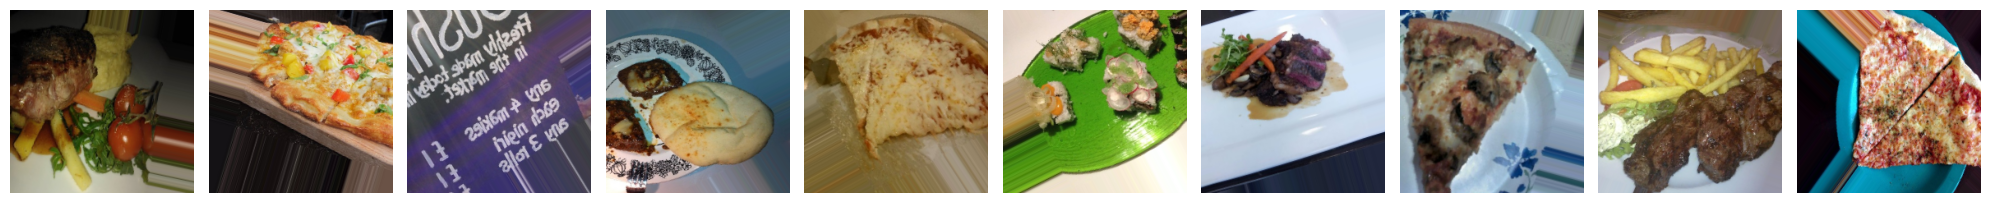

In [39]:
# Візуалізація деяких зображень
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(train_generator)
plot_images(images[:10]) 

In [40]:

def plot_training_history(history):
    """
    Функція для візуалізації історії тренування моделі.
    
    Параметри:
    history - об'єкт історії, отриманий від model.fit().
    """
    # Витягнути показники втрат та точності
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Епохи
    epochs = range(1, len(train_loss) + 1)

    # Графік втрат
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Графік точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


#### Модель  №1

Epoch 1/10
90/90 - 74s - loss: 1.3370 - accuracy: 0.4039 - val_loss: 1.0177 - val_accuracy: 0.5341 - 74s/epoch - 823ms/step
Epoch 2/10
90/90 - 72s - loss: 1.0228 - accuracy: 0.4917 - val_loss: 0.9338 - val_accuracy: 0.5568 - 72s/epoch - 804ms/step
Epoch 3/10
90/90 - 72s - loss: 0.8970 - accuracy: 0.5917 - val_loss: 0.8346 - val_accuracy: 0.6023 - 72s/epoch - 795ms/step
Epoch 4/10
90/90 - 74s - loss: 0.8461 - accuracy: 0.6183 - val_loss: 0.7959 - val_accuracy: 0.6318 - 74s/epoch - 817ms/step
Epoch 5/10
90/90 - 72s - loss: 0.8510 - accuracy: 0.6272 - val_loss: 0.8111 - val_accuracy: 0.6818 - 72s/epoch - 800ms/step
Epoch 6/10
90/90 - 66s - loss: 0.7872 - accuracy: 0.6611 - val_loss: 0.7917 - val_accuracy: 0.6477 - 66s/epoch - 734ms/step
Epoch 7/10
90/90 - 77s - loss: 0.7664 - accuracy: 0.6783 - val_loss: 0.6962 - val_accuracy: 0.7182 - 77s/epoch - 854ms/step
Epoch 8/10
90/90 - 69s - loss: 0.7401 - accuracy: 0.6867 - val_loss: 0.7585 - val_accuracy: 0.6750 - 69s/epoch - 767ms/step
Epoch 9/

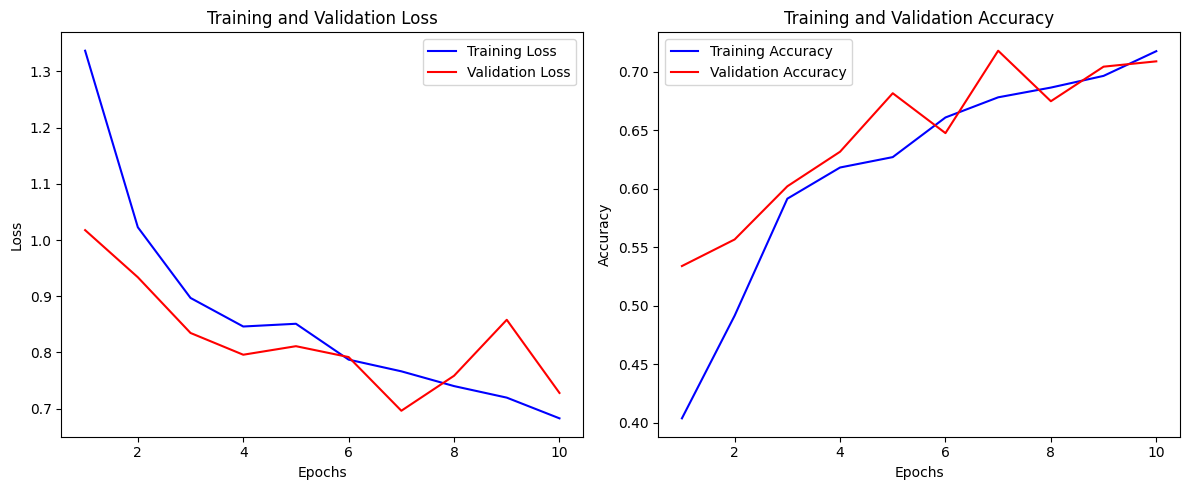

In [41]:
steps_per_epoch = 1800 // 20
validation_steps = 450 // 20

model_1 = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history_1 = model_1.fit(train_generator, validation_data=validation_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_steps=validation_steps, verbose=2)
plot_training_history(history_1)


37/37 [==============================] - 6s 158ms/step - loss: 0.5903 - accuracy: 0.7473
Test Loss: 0.5903472304344177
Test Accuracy: 0.7472972869873047


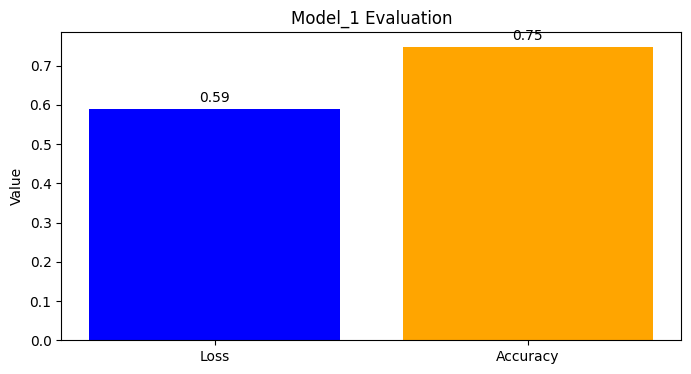

In [42]:
test_steps = 750 // 20
results = model_1.evaluate(testing_generator, steps=test_steps)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
metrics_names = ['Loss', 'Accuracy']
metrics_values = results

plt.figure(figsize=(8, 4))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange'])
plt.title('Model_1 Evaluation')
plt.ylabel('Value')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

#### Модель №2

Epoch 1/10
90/90 - 64s - loss: 1.8451 - accuracy: 0.3839 - val_loss: 1.0750 - val_accuracy: 0.4114 - 64s/epoch - 709ms/step
Epoch 2/10
90/90 - 61s - loss: 1.0748 - accuracy: 0.4511 - val_loss: 1.0738 - val_accuracy: 0.4909 - 61s/epoch - 672ms/step
Epoch 3/10
90/90 - 63s - loss: 1.0407 - accuracy: 0.5017 - val_loss: 1.0423 - val_accuracy: 0.4841 - 63s/epoch - 705ms/step
Epoch 4/10
90/90 - 65s - loss: 1.0127 - accuracy: 0.5206 - val_loss: 0.9902 - val_accuracy: 0.5409 - 65s/epoch - 721ms/step
Epoch 5/10
90/90 - 62s - loss: 0.9646 - accuracy: 0.5528 - val_loss: 0.9113 - val_accuracy: 0.5841 - 62s/epoch - 694ms/step
Epoch 6/10
90/90 - 66s - loss: 0.8939 - accuracy: 0.5944 - val_loss: 0.9046 - val_accuracy: 0.5864 - 66s/epoch - 735ms/step
Epoch 7/10
90/90 - 61s - loss: 0.8934 - accuracy: 0.5956 - val_loss: 0.8423 - val_accuracy: 0.6045 - 61s/epoch - 678ms/step
Epoch 8/10
90/90 - 61s - loss: 0.8659 - accuracy: 0.6150 - val_loss: 0.9395 - val_accuracy: 0.5591 - 61s/epoch - 679ms/step
Epoch 9/

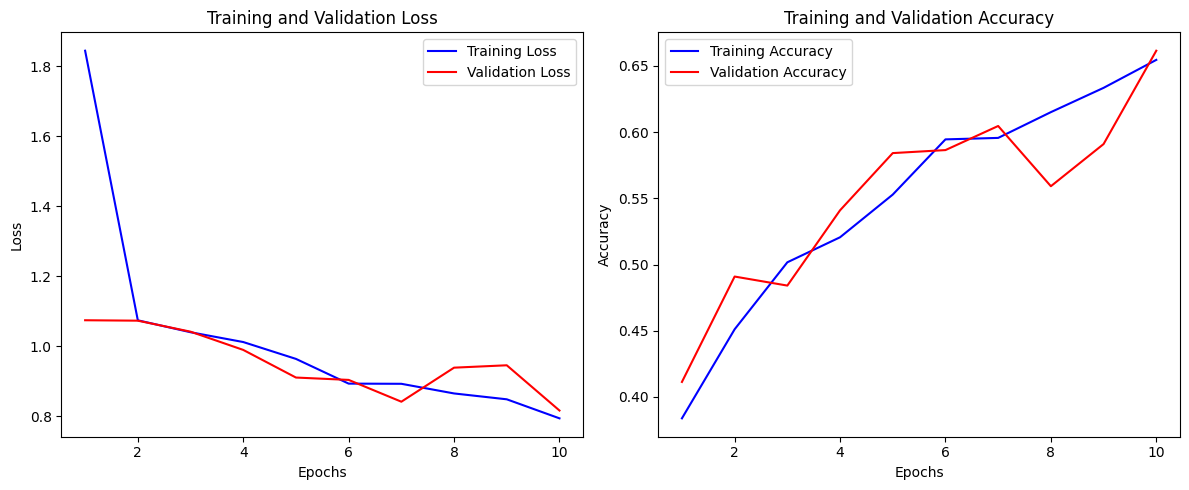

In [43]:
steps_per_epoch = 1800 // 20
validation_steps = 450 // 20

model_2 = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history_2 = model_2.fit(train_generator, validation_data=validation_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_steps=validation_steps, verbose=2)
plot_training_history(history_2)


37/37 [==============================] - 6s 151ms/step - loss: 0.6859 - accuracy: 0.7108
Test Loss: 0.6858853697776794
Test Accuracy: 0.7108108401298523


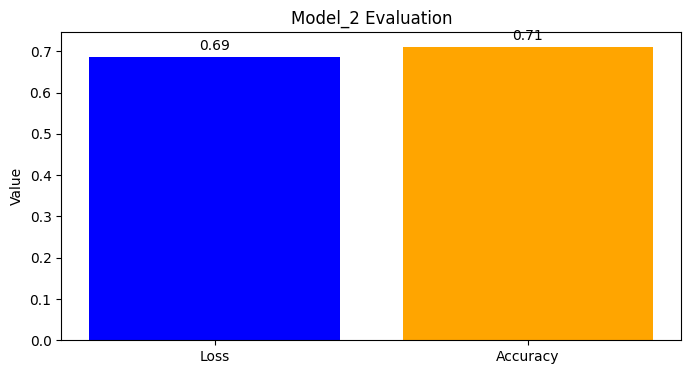

In [44]:
test_steps = 750 // 20
results = model_2.evaluate(testing_generator, steps=test_steps)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
metrics_names = ['Loss', 'Accuracy']
metrics_values = results

plt.figure(figsize=(8, 4))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange'])
plt.title('Model_2 Evaluation')
plt.ylabel('Value')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

### Модель №3

In [45]:
steps_per_epoch = 1800 // 20
validation_steps = 450 // 20

model_3 = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history_3 = model_3.fit(train_generator, validation_data=validation_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_steps=validation_steps, verbose=2)

Epoch 1/10
90/90 - 115s - loss: 1.1123 - accuracy: 0.3400 - val_loss: 1.0669 - val_accuracy: 0.4068 - 115s/epoch - 1s/step
Epoch 2/10
90/90 - 152s - loss: 1.0548 - accuracy: 0.4333 - val_loss: 0.9471 - val_accuracy: 0.5273 - 152s/epoch - 2s/step
Epoch 3/10
90/90 - 149s - loss: 0.9920 - accuracy: 0.5000 - val_loss: 0.9022 - val_accuracy: 0.5409 - 149s/epoch - 2s/step
Epoch 4/10
90/90 - 151s - loss: 0.9591 - accuracy: 0.5056 - val_loss: 0.8507 - val_accuracy: 0.5909 - 151s/epoch - 2s/step
Epoch 5/10
90/90 - 149s - loss: 0.9607 - accuracy: 0.5217 - val_loss: 0.8918 - val_accuracy: 0.5818 - 149s/epoch - 2s/step
Epoch 6/10
90/90 - 152s - loss: 0.9213 - accuracy: 0.5628 - val_loss: 0.9439 - val_accuracy: 0.5432 - 152s/epoch - 2s/step
Epoch 7/10
90/90 - 149s - loss: 0.9013 - accuracy: 0.5706 - val_loss: 0.8329 - val_accuracy: 0.5864 - 149s/epoch - 2s/step
Epoch 8/10
90/90 - 149s - loss: 0.8913 - accuracy: 0.5700 - val_loss: 0.8152 - val_accuracy: 0.5932 - 149s/epoch - 2s/step
Epoch 9/10
90/90

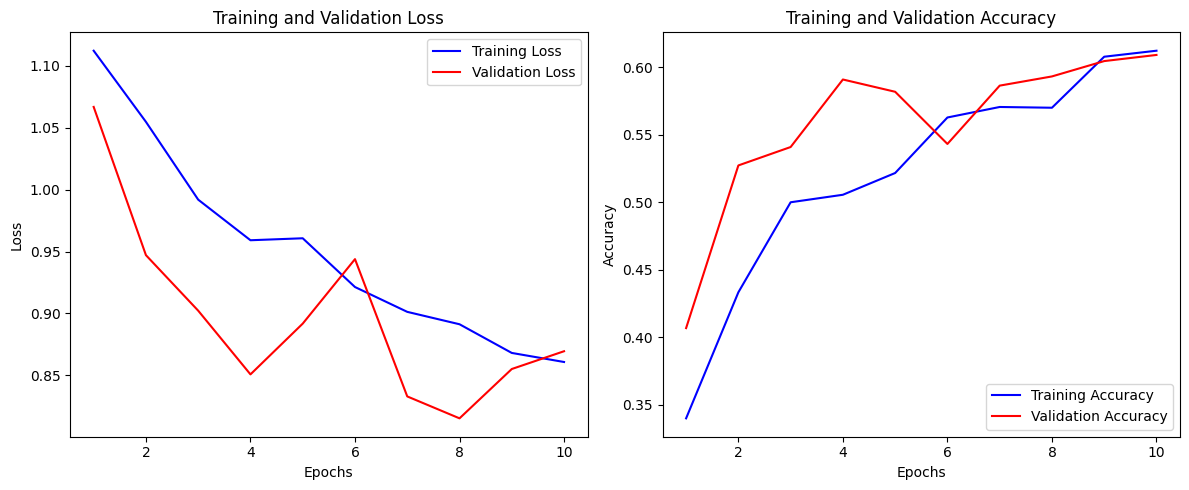

37/37 [==============================] - 7s 189ms/step - loss: 0.7601 - accuracy: 0.6514
Test Loss: 0.7601466774940491
Test Accuracy: 0.6513513326644897


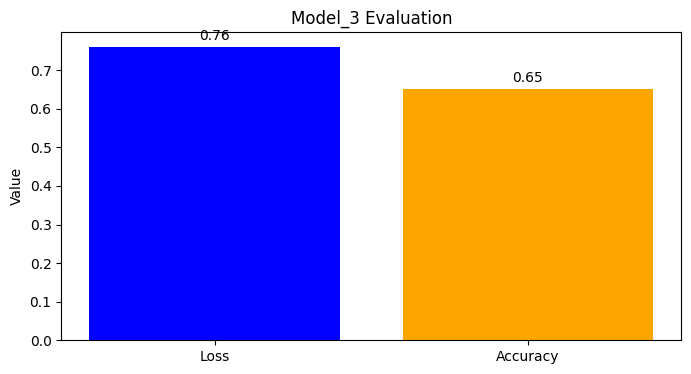

In [46]:
plot_training_history(history_3)
test_steps = 750 // 20
results = model_3.evaluate(testing_generator, steps=test_steps)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
metrics_names = ['Loss', 'Accuracy']
metrics_values = results

plt.figure(figsize=(8, 4))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange'])
plt.title('Model_3 Evaluation')
plt.ylabel('Value')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [63]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history_transfer = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_steps=validation_steps, verbose=2)


Epoch 1/10
90/90 - 80s - loss: 1.1110 - accuracy: 0.3228 - val_loss: 1.1048 - val_accuracy: 0.3250 - 80s/epoch - 886ms/step
Epoch 2/10
90/90 - 70s - loss: 1.1130 - accuracy: 0.3572 - val_loss: 1.1178 - val_accuracy: 0.3386 - 70s/epoch - 777ms/step
Epoch 3/10
90/90 - 73s - loss: 1.1093 - accuracy: 0.3172 - val_loss: 1.0999 - val_accuracy: 0.3341 - 73s/epoch - 816ms/step
Epoch 4/10
90/90 - 72s - loss: 1.1091 - accuracy: 0.3411 - val_loss: 1.1461 - val_accuracy: 0.3295 - 72s/epoch - 798ms/step
Epoch 5/10
90/90 - 70s - loss: 1.1119 - accuracy: 0.3456 - val_loss: 1.1264 - val_accuracy: 0.3205 - 70s/epoch - 775ms/step
Epoch 6/10
90/90 - 65s - loss: 1.1206 - accuracy: 0.3517 - val_loss: 1.0994 - val_accuracy: 0.3364 - 65s/epoch - 721ms/step
Epoch 7/10
90/90 - 64s - loss: 1.1129 - accuracy: 0.3306 - val_loss: 1.1040 - val_accuracy: 0.3318 - 64s/epoch - 709ms/step
Epoch 8/10
90/90 - 64s - loss: 1.1085 - accuracy: 0.3411 - val_loss: 1.0987 - val_accuracy: 0.3341 - 64s/epoch - 712ms/step
Epoch 9/

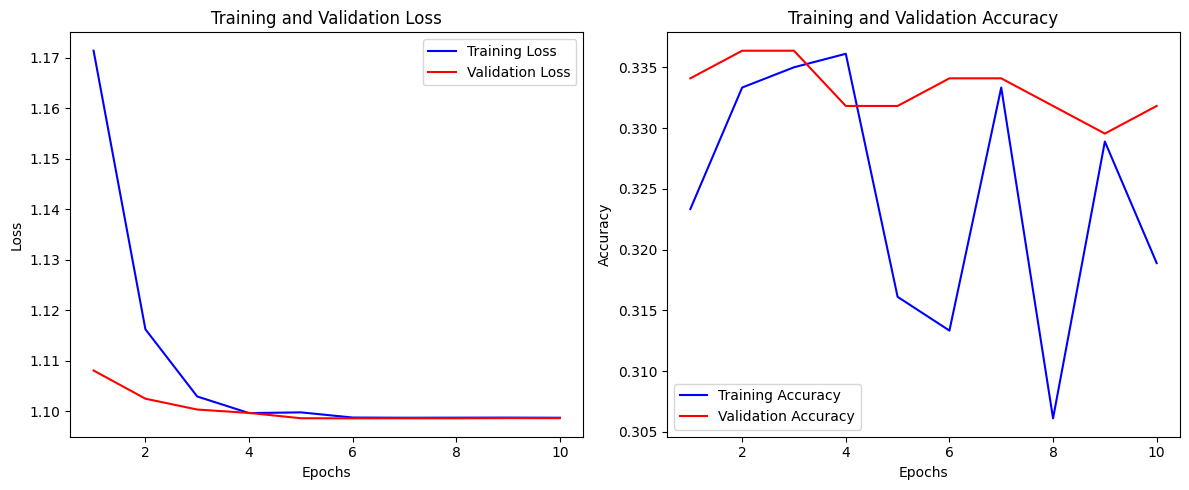

38/38 [==============================] - 23s 598ms/step - loss: 1.0986 - accuracy: 0.3333
Transfer Learning Model Accuracy: 0.3333333432674408
37/37 [==============================] - 22s 593ms/step - loss: 1.0986 - accuracy: 0.3311
Test Loss: 1.0986217260360718
Test Accuracy: 0.3310810923576355


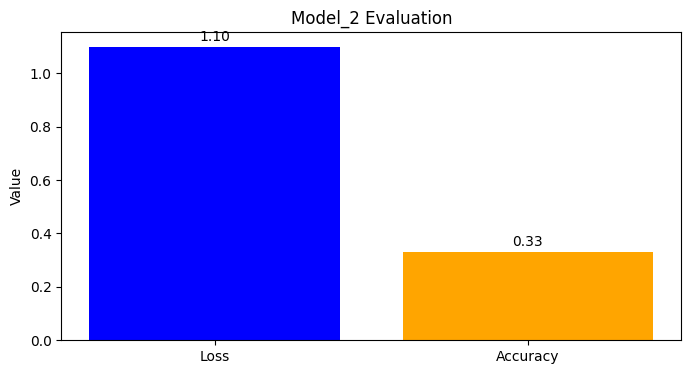

In [59]:
plot_training_history(history_transfer)
# Оцінка базової CNN моделі

transfer_model_evaluation = model.evaluate(testing_generator)

# Виведення результатів
print("Transfer Learning Model Accuracy:", transfer_model_evaluation[1])
test_steps = 750 // 20
results = model.evaluate(testing_generator, steps=test_steps)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
metrics_names = ['Loss', 'Accuracy']
metrics_values = results

plt.figure(figsize=(8, 4))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange'])
plt.title('Model_2 Evaluation')
plt.ylabel('Value')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()